# Feature reduction of the instance cleaned dataset

## Importing the required modules

In [23]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prep import reduce

## Registering the start time for runtime calculation

In [24]:
start = time.time()

## Reducing the features with a threshold of 0.7

In [25]:
reduce('../data/sup_dedup_norm.csv', '../data/sup_dedup_norm_red.csv', 0.7)

Columns to delete = 68, columns remaining = 14


## Reading the reduced data into dataframe

In [26]:
sup = pd.read_csv("../data/sup_dedup_norm_red.csv",sep=',',header=0)

## Display basic dataset statistics

In [27]:
sup.describe()

,range_atomic_mass,gmean_atomic_radius,range_Density,gmean_ElectronAffinity,wtd_range_ElectronAffinity,wtd_std_ElectronAffinity,wtd_gmean_FusionHeat,mean_ThermalConductivity,gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_std_Valence,critical_temp
count,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000,12796.000000
mean,0.569351,0.392914,0.393922,0.157529,0.275793,0.265578,0.093322,0.270826,0.095021,0.480194,0.160051,0.458143,0.225549,33.891410
std,0.256841,0.085820,0.178311,0.087185,0.128364,0.123047,0.116731,0.115343,0.106320,0.189543,0.109356,0.296588,0.148854,33.961201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500
25%,0.388973,0.350228,0.310688,0.097501,0.160447,0.198813,0.010625,0.185649,0.030244,0.346092,0.078568,0.153512,0.104083,5.000000
50%,0.590973,0.387619,0.396598,0.144724,0.325429,0.284905,0.046349,0.285072,0.047793,0.485855,0.141810,0.577962,0.168544,19.500000
75%,0.755170,0.436707,0.451113,0.196084,0.350787,0.317593,0.156511,0.333797,0.128097,0.622204,0.228689,0.762802,0.338423,62.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,143.000000


## Build correlation matrix and take absolute values

Only the strength of the correlation matters

In [28]:
crmx = sup.corr().abs()
crmx.style.background_gradient(cmap='YlOrRd')

,range_atomic_mass,gmean_atomic_radius,range_Density,gmean_ElectronAffinity,wtd_range_ElectronAffinity,wtd_std_ElectronAffinity,wtd_gmean_FusionHeat,mean_ThermalConductivity,gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_std_Valence,critical_temp
range_atomic_mass,1.000000,0.241417,0.672664,0.208092,0.174289,0.380517,0.356578,0.175307,0.376735,0.219053,0.211463,0.507029,0.084154,0.495948
gmean_atomic_radius,0.241417,1.000000,0.077453,0.104779,0.134353,0.438635,0.217268,0.069806,0.297098,0.082824,0.014090,0.193241,0.226314,0.168998
range_Density,0.672664,0.077453,1.000000,0.011548,0.157921,0.312240,0.162923,0.210932,0.123166,0.177669,0.149157,0.299922,0.137106,0.250397
gmean_ElectronAffinity,0.208092,0.104779,0.011548,1.000000,0.169932,0.006890,0.227788,0.102292,0.139915,0.324283,0.100786,0.266041,0.146565,0.384283
wtd_range_ElectronAffinity,0.174289,0.134353,0.157921,0.169932,1.000000,0.377205,0.233284,0.240017,0.193361,0.151126,0.244638,0.301799,0.123342,0.162084
wtd_std_ElectronAffinity,0.380517,0.438635,0.312240,0.006890,0.377205,1.000000,0.338484,0.065594,0.390538,0.048902,0.092332,0.349082,0.268385,0.313419
wtd_gmean_FusionHeat,0.356578,0.217268,0.162923,0.227788,0.233284,0.338484,1.000000,0.131708,0.590876,0.109618,0.169523,0.587465,0.098167,0.465304
mean_ThermalConductivity,0.175307,0.069806,0.210932,0.102292,0.240017,0.065594,0.131708,1.000000,0.373126,0.059766,0.562363,0.590727,0.249461,0.354339
gmean_ThermalConductivity,0.376735,0.297098,0.123166,0.139915,0.193361,0.390538,0.590876,0.373126,1.000000,0.163148,0.023156,0.422389,0.003861,0.391171
entropy_ThermalConductivity,0.219053,0.082824,0.177669,0.324283,0.151126,0.048902,0.109618,0.059766,0.163148,1.000000,0.093997,0.063206,0.189750,0.121490


In [29]:
with open('../graph/corr_red.html', 'w') as f:
    print(sup.corr().abs().style.background_gradient(cmap='YlOrRd').to_html(), file=f)

## Heatmap of the reduced correlation matrix

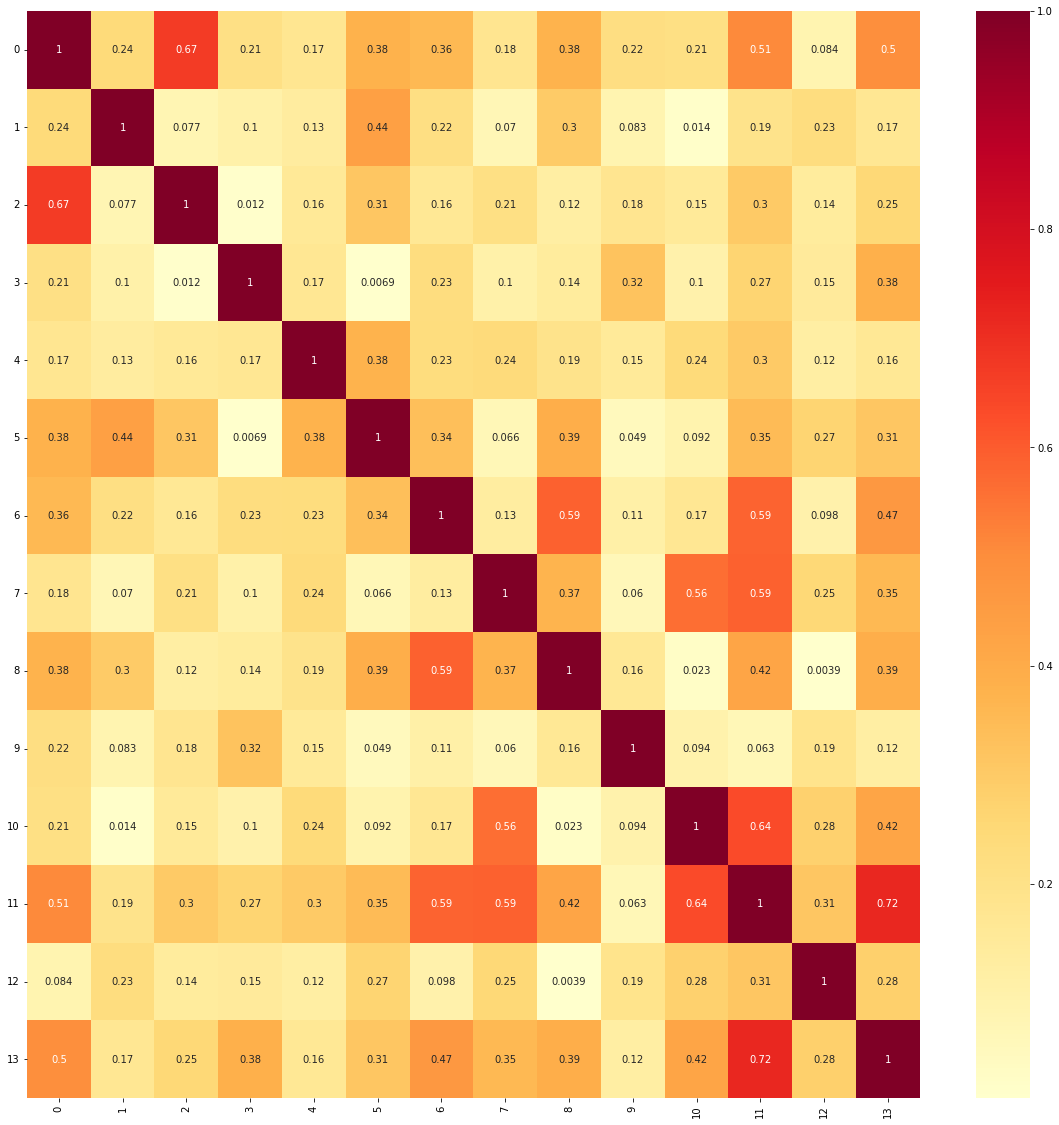

In [30]:
colnum = [list(sup.columns).index(i) for i in sup.columns]

fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(crmx, cmap='YlOrRd', annot=True, xticklabels=colnum, yticklabels=colnum)
ax.set_xticklabels(labels=colnum, rotation=90)
ax.set_yticklabels(labels=colnum, rotation=0)
fig.savefig('../graph/Corr_reduced_heatmap.jpg', dpi=150)

## Output of elapsed time

In [31]:
end = time.time()
runtime = end - start
print(f"Runtime = {runtime:.2f} s")

Runtime = 6.07 s
